# Конвергентная валидность: международные гендерные индексы за 2023 год: ОЭСР, ООН, ВЭФ

In [1]:
from randan.descriptive_statistics import ScaleStatistics # интервальная статистика
import pandas as pd # для обработки и анализа структурированных данных
import numpy as np# для корректной работы рандана 
from randan.bivariate_association import Correlation
import matplotlib.pyplot as plt # для визуализации данных
import seaborn as sns # для визуализации данных

Массив данных находится в папке: https://disk.yandex.ru/d/PWOTilngObaAJg 

In [2]:
# загружаем таблицу
df = pd.read_excel('2023_reversed.xlsx')

In [3]:
# дескриптивная статистика
# от 114 до 146 стран в рейтингах
df.describe()

,ООН Индекс эмпауэрмента,ООН Индекс равноправия,ВЭФ Индекс разрыва,ОЭСР Индекс Инстит. мер
count,114.000000,114.000000,146.000000,140.000000
mean,0.607316,0.705237,0.711966,0.708129
std,0.134632,0.128897,0.067697,0.160223
min,0.141000,0.141000,0.405000,0.326000
25%,0.518000,0.622250,0.676000,0.592250
50%,0.615000,0.726500,0.711000,0.748000
75%,0.705500,0.802000,0.760750,0.832000
max,0.828000,0.925000,0.912000,0.933000


In [4]:
# удаляем пробелы, остается 102 страны
df = df.dropna()
df

,Страна,ООН Индекс эмпауэрмента,ООН Индекс равноправия,ВЭФ Индекс разрыва,ОЭСР Индекс Инстит. мер,Доход,Регион
1,Albania,0.610,0.860,0.791,0.911,Выше среднего,Европа и Северная Америка
7,Armenia,0.656,0.770,0.721,0.763,Выше среднего,Европа и Северная Америка
8,Australia,0.805,0.870,0.778,0.846,Высокий,Азия и Тихоокеанский
9,Austria,0.778,0.808,0.740,0.902,Высокий,Европа и Северная Америка
13,Bangladesh,0.443,0.527,0.722,0.507,Ниже среднего,Азия и Тихоокеанский
...,...,...,...,...,...,...,...
193,United States,0.752,0.787,0.748,0.809,Высокий,Европа и Северная Америка
194,Uruguay,0.688,0.825,0.714,0.806,Высокий,Латинская и Центральная Америка
198,Viet Nam,0.612,0.758,0.711,0.755,Ниже среднего,Азия и Тихоокеанский
200,Zambia,0.441,0.637,0.699,0.689,Ниже среднего,Африка к югу от Сахары


In [5]:
# нормализуем данные
# (df-df.mean ())/df.std()

In [6]:
# проверяем нормальность распределения по каждому рейтингу
# тест Колмогорова-Смирнова
# распределение не является нормальным
ss = ScaleStatistics(df, ['ООН Индекс равноправия'], show_results=False, normality_test=True, normality_test_type='ks') 
ss.summary() 


NORMALITY TESTS
------------------



,statistic,p-value
ООН Индекс равноправия,0.129,0.000


,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
ООН Индекс равноправия,102.0,0.594,0.7385,0.710539,0.62225,0.80525,0.183,0.343985,0.393,0.925,0.532,0.117617,0.013834,0.994721,0.99937


In [7]:
# корреляционный анализ значений рейтинга по годам, метод Спирмена
corr = Correlation(df, method = 'spearman', two_tailed = True)


CORRELATION SUMMARY (SPEARMAN METHOD, 2-TAILED)
------------------
The following variables were removed from the analysis since they do not belong to numerical dtypes: Страна, Доход, Регион



Note: Each empty index duplicates the previous one.
Maximum correlation is 0.85 (p-value 0.0) for variables ООН Индекс равноправия and ВЭФ Индекс разрыва,
minimum correlation is 0.685 (p-value 0.0) for variables ВЭФ Индекс разрыва and ОЭСР Индекс Инстит. мер.


In [8]:
# приводим в табличный вид для приложения в диссертации 
# метод Спирмена, для сравнения с другими рейтингами
corr.correlation_matrix

ООН Индекс эмпауэрмента  \
ООН Индекс эмпауэрмента Coefficient             1.000000e+00   
                        p-value                          NaN   
                        N                       1.020000e+02   
ООН Индекс равноправия  Coefficient             8.205337e-01   
                        p-value                 4.940795e-26   
                        N                       1.020000e+02   
ВЭФ Индекс разрыва      Coefficient             7.521610e-01   
                        p-value                 8.100627e-20   
                        N                       1.020000e+02   
ОЭСР Индекс Инстит. мер Coefficient             7.772827e-01   
                        p-value                 7.639323e-22   
                        N                       1.020000e+02   

                                     ООН Индекс равноправия  \
ООН Индекс эмпауэрмента Coefficient            8.205337e-01   
                        p-value                4.940795e-26   
                        N                      1.020000e+02   
ООН Индекс равноправия  Coefficient            1.000000e+00   
                        p-value                         NaN   
                        N                      1.020000e+02   
ВЭФ Индекс разрыва      Coefficient            8.504186e-01   
                        p-value                1.193943e-29   
                        N                      1.020000e+02   
ОЭСР Индекс Инстит. мер Coefficient            7.200516e-01   
                        p-value                1.481139e-17   
                        N                      1.020000e+02   

                                     ВЭФ Индекс разрыва  \
ООН Индекс эмпауэрмента Coefficient        7.521610e-01   
                        p-value            8.100627e-20   
                        N                  1.020000e+02   
ООН Индекс равноправия  Coefficient        8.504186e-01   
                        p-value            1.193943e-29   
                        N                  1.020000e+02   
ВЭФ Индекс разрыва      Coefficient        1.000000e+00   
                        p-value                     NaN   
                        N                  1.020000e+02   
ОЭСР Индекс Инстит. мер Coefficient        6.854030e-01   
                        p-value            1.919298e-15   
                        N                  1.020000e+02   

                                     ОЭСР Индекс Инстит. мер  
ООН Индекс эмпауэрмента Coefficient             7.772827e-01  
                        p-value                 7.639323e-22  
                        N                       1.020000e+02  
ООН Индекс равноправия  Coefficient             7.200516e-01  
                        p-value                 1.481139e-17  
                        N                       1.020000e+02  
ВЭФ Индекс разрыва      Coefficient             6.854030e-01  
                        p-value                 1.919298e-15  
                        N                       1.020000e+02  
ОЭСР Индекс Инстит. мер Coefficient             1.000000e+00  
                        p-value                          NaN  
                        N                       1.020000e+02

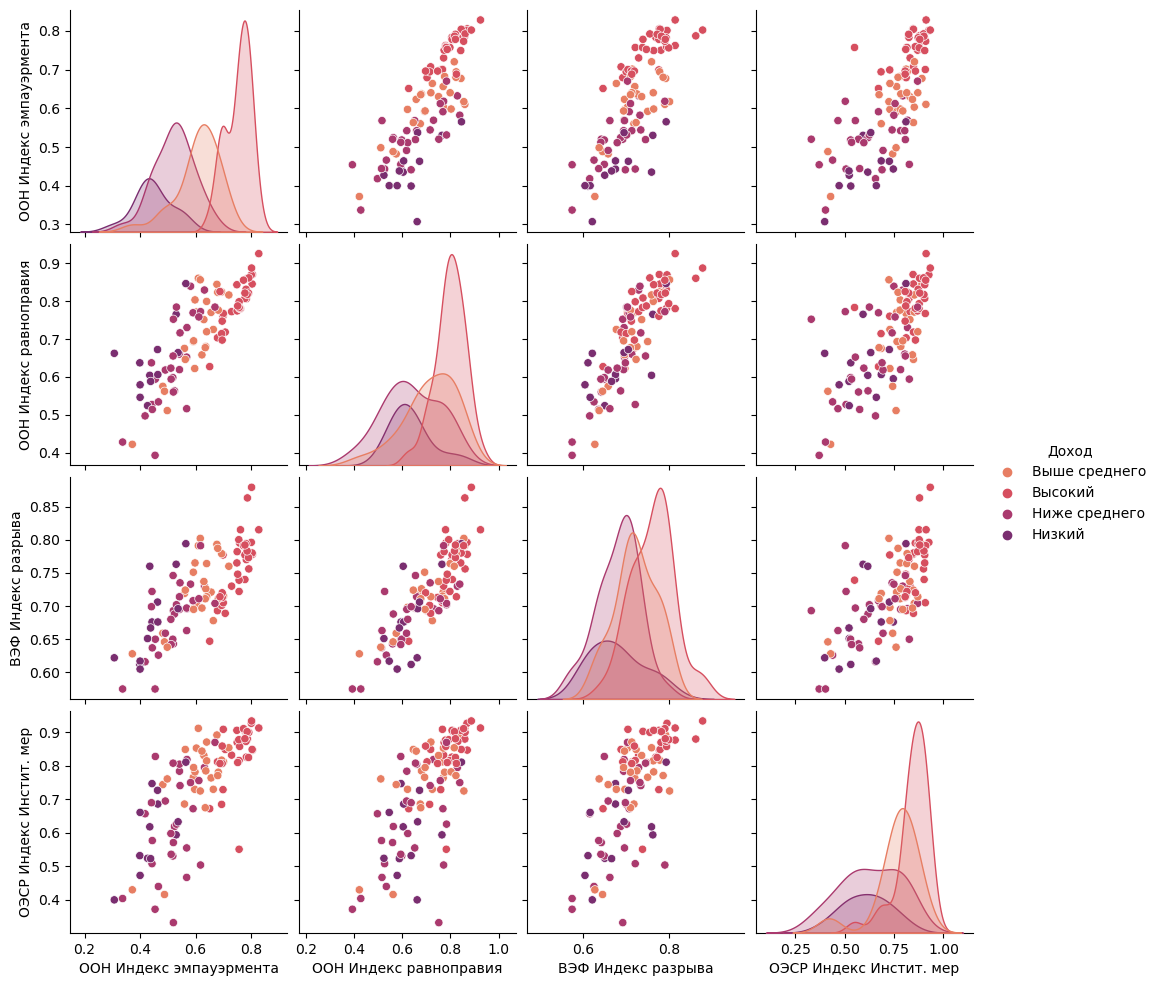

In [13]:
sns.pairplot(df, palette = 'flare', hue = 'Доход');

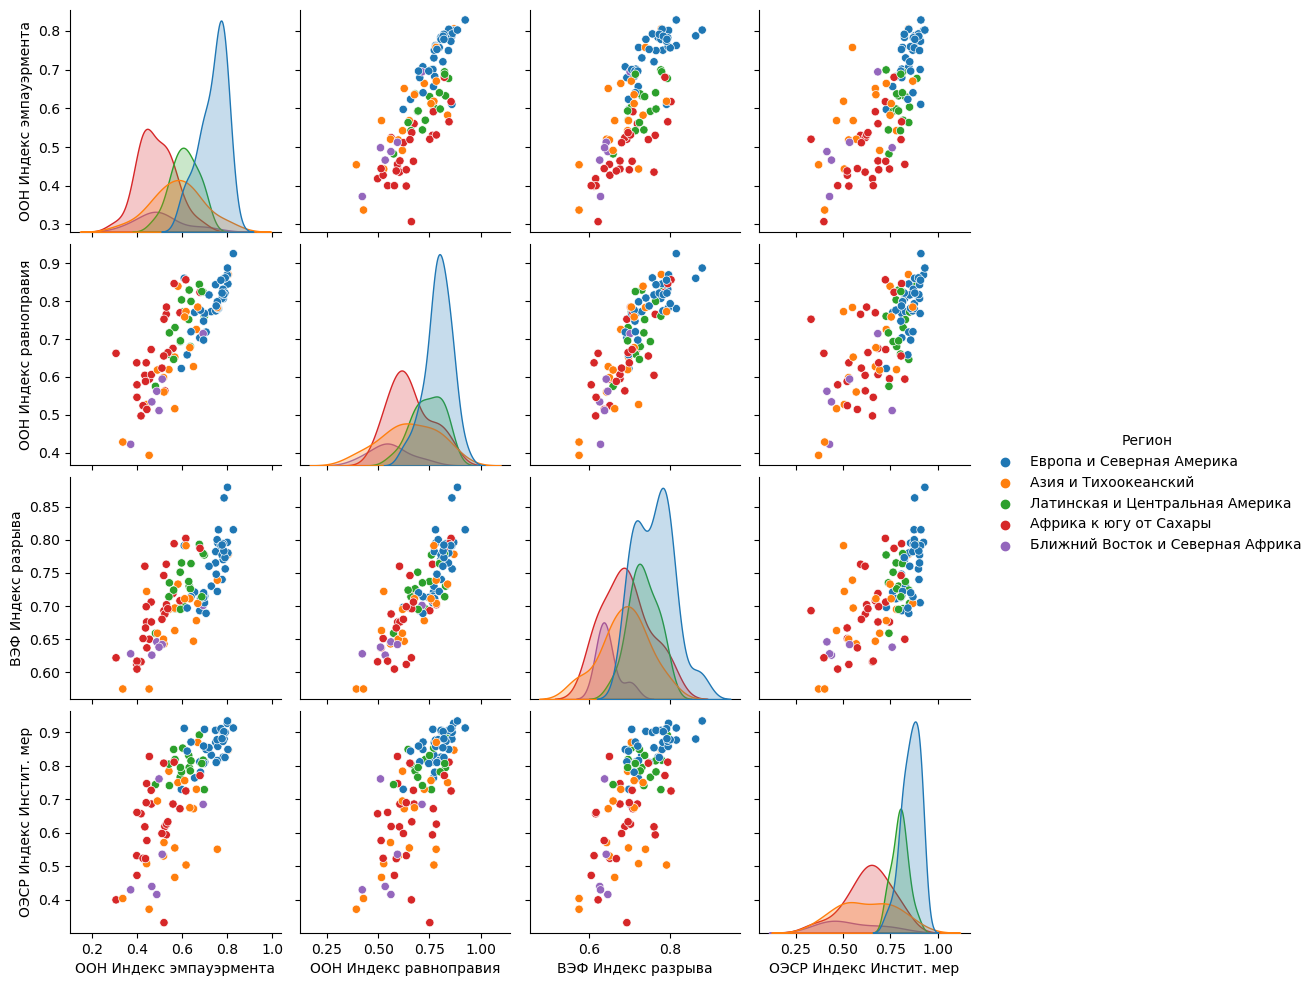

In [10]:
sns.pairplot(df, hue = 'Регион');

/var/folders/40/4tj44zl90rv_7zclngp8l_j00000gn/T/ipykernel_26663/3897674914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/40/4tj44zl90rv_7zclngp8l_j00000gn/T/ipykernel_26663/3897674914.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method = 'spearman'), square=False, cmap=v, mask=mask, annot=True);


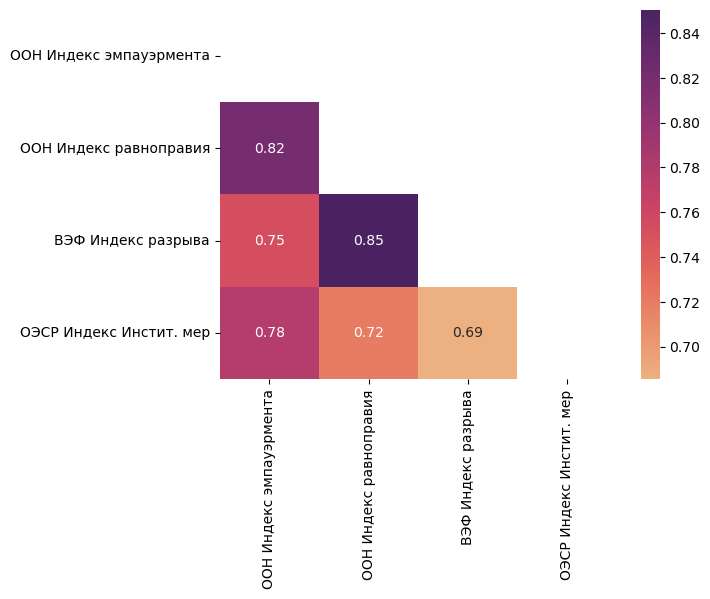

In [12]:
corr = df.corr()
v = sns.color_palette("flare", as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(df.corr(method = 'spearman'), square=False, cmap=v, mask=mask, annot=True);